# LIVRIA : Visualisation des données récoltées par le questionnaire

Dans ce notebook, j'ai cherché à représenter au mieux les données que nous avons récoltées avec le questionnaire. Une bonne représentation des données permet de mieux cerner ces dernières, d'en avoir une meilleure compréhension. Visualiser les données par des courbes, des histogrammes ou d'autres types de représentations graphiques permet parfois de faire ressurgir des informations cruciales sur les données, d'où l'importance de mettre en oeuvre cette visualisation. 

### Import des librairies et des données

In [13]:
# On importe les librairies nécessaires à l'analyse statistique de nos données sur les thèmes.
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Lecture des fichiers 
dataTheme = pd.read_csv('data/df_sortie.csv', sep='\t')
dataCriteres = pd.read_csv('data/df_entree.csv', sep='\t')

## I. Visualisation des données sur les thèmes

In [4]:
# On supprime la colonne inutile et on montre un bout du tableau :
del dataTheme['Unnamed: 0']
dataTheme.head()

,ArtsCulture,BdComics,DocMedia,Erotisme,Esoterisme,HistGeo,Jeunesse,LittEtrangere,LoisirVie,Philosophie,RomanFiction,SHS,SanteBE,ScienceTechnique
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0


In [5]:
# On regarde combien de fois chaque thème a été coché dans le questionnaire :
poidsTheme = dataTheme.sum()
# On l'affiche :
df_poidsTheme = pd.DataFrame(poidsTheme)
df_poidsTheme.columns = ['Compte']
df_poidsTheme

,Compte
ArtsCulture,172
BdComics,414
DocMedia,189
Erotisme,138
Esoterisme,83
HistGeo,250
Jeunesse,251
LittEtrangere,486
LoisirVie,129
Philosophie,260


In [6]:
# On classe ces thèmes par ordre croissant
valBarplot = np.sort(poidsTheme.values)

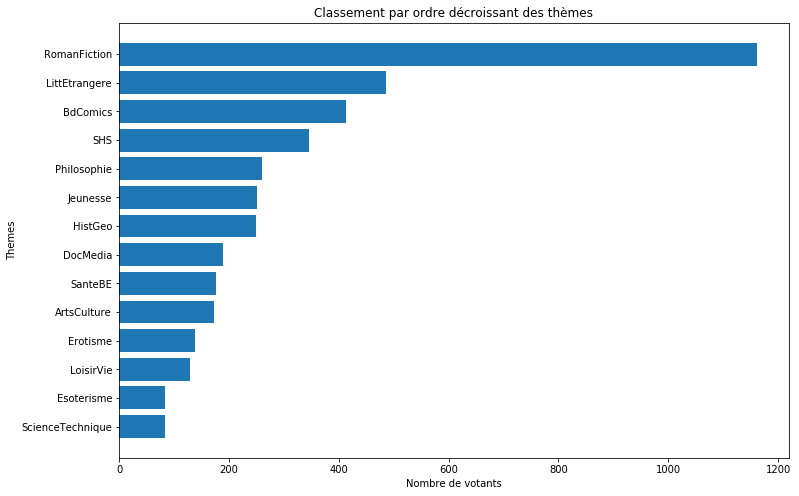

In [7]:
# On  crée un diagramme à barres représentant le classement des thèmes par nombre de votes

plt.barh(range(len(valBarplot)), valBarplot, height=0.8, align='center')
plt.yticks(range(len(valBarplot)), ['ScienceTechnique', 'Esoterisme', 'LoisirVie', 'Erotisme', 'ArtsCulture', 'SanteBE', 'DocMedia', 'HistGeo', 'Jeunesse', 'Philosophie', 'SHS', 'BdComics','LittEtrangere', 'RomanFiction'])
plt.title("Classement par ordre décroissant des thèmes")
plt.xlabel('Nombre de votants')
plt.ylabel('Themes')
plt.gcf().set_size_inches(12, 8)
plt.show()


On peut voir ici que la quasi-totalité des personnes ont indiqué qu'elles aiment lire des romans et fictions. Ces "thèmes" - entre guillemets car le roman est un genre littéraire - sont suivis par la littérature étrangère et les  Bandes Dessinées. 



In [8]:
# On observe maintenant le nombre de thèmes cochés par chaque personne
nbThemeIndiv = dataTheme.sum(axis=1)
# En voici un extrait :
df_nbThemeIndiv = pd.DataFrame(nbThemeIndiv)
df_nbThemeIndiv.columns = ['Nombre de thèmes cochés']
df_nbThemeIndiv.head()

,Nombre de thèmes cochés
0,2
1,2
2,3
3,1
4,3


In [9]:
# description statistique :
df_nbThemeIndiv.describe()

,Nombre de thèmes cochés
count,1279.000000
mean,3.235340
std,1.775367
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


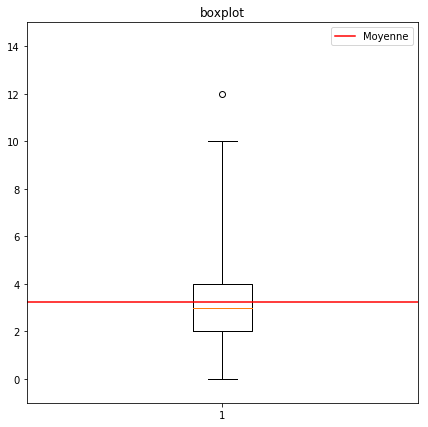

In [10]:
# Représentation de cette répartition par une boite à moustache :
plt.boxplot(nbThemeIndiv, whis=3)
plt.axhline(y=3.235340,color="red", label="Moyenne")
plt.ylim(-1, 15)
plt.title('boxplot')
plt.legend(loc="best")
plt.gcf().set_size_inches(7, 7)
plt.show()

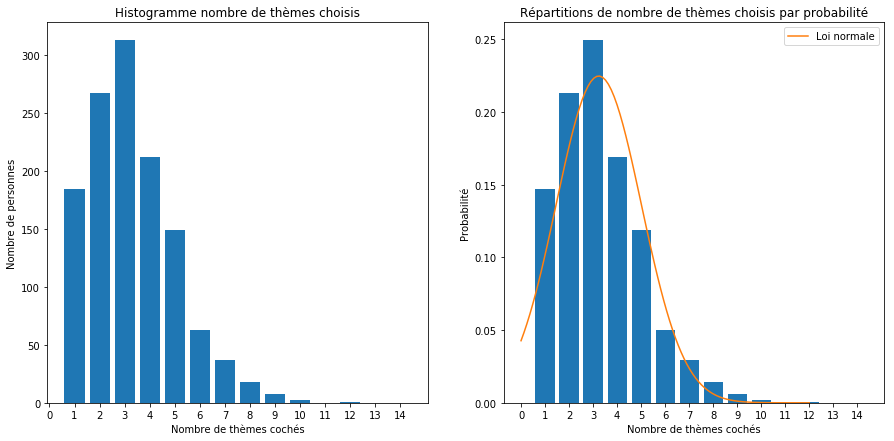

In [11]:
# On créer un histogramme repésentant la répartition du nombre de thème choisis par la population ayant répondu au questionnaire :

# Graphe de gauche
plt.subplot(1, 2, 1)
axes = plt.gca()
bins = [nbThemeIndiv + 0.5 for nbThemeIndiv in range(0, 15)]
plt.hist(nbThemeIndiv, bins = bins, rwidth = 0.8)
axes.xaxis.set_ticks(range(15))
plt.xlabel('Nombre de thèmes cochés')
plt.ylabel('Nombre de personnes')
plt.title('Histogramme nombre de thèmes choisis')
plt.gcf().set_size_inches(15, 7)
#Graphe de droite
plt.subplot(1, 2, 2)
axes = plt.gca()
mean = 3.235340 
std = 1.775367
x = np.linspace(0, 12, 100)
y = stats.norm.pdf(x,mean,std)
bins = [nbThemeIndiv + 0.5 for nbThemeIndiv in range(0, 15)]
plt.hist(nbThemeIndiv, bins = bins, density='true', rwidth = 0.8)
plt.plot(x,y, label="Loi normale")
plt.legend(loc='best')
plt.title('Répartitions de nombre de thèmes choisis par probabilité')
axes.xaxis.set_ticks(range(0,15))
plt.xlabel('Nombre de thèmes cochés')
plt.ylabel('Probabilité')
plt.gcf().set_size_inches(15, 7)
plt.show()

## Visualisation des données sur les critères d'entrée

In [12]:
# On supprime la colonne inutile et on montre un bout du tableau :
del dataCriteres['Unnamed: 0']
dataCriteres.head()

,Agite,Altruiste,Ambitieux,Amusant,Autoritaire,Aventurier,Calme,Connaissance,Consciencieux,Creatif,...,Reserve,Rien faire,Sexe,Sociable,Sport,Sportif,Style,Theatre,Tout,Voyage
0,0,0,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,1
1,0,1,0,0,0,1,1,0,1,0,...,0,1,1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,1,1,1,0,0,0,0


In [25]:
sommeColumn = pd.DataFrame(dataCriteres.sum())
sommeColumn.columns=['Critères']
sommeColumn

,Critères
Agite,145
Altruiste,420
Ambitieux,322
Amusant,463
Autoritaire,164
Aventurier,268
Calme,705
Connaissance,653
Consciencieux,387
Creatif,481


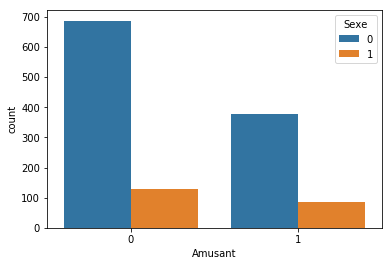

In [20]:
sns.countplot(x="Amusant", hue="Sexe", data=dataCriteres)